# Импорт модулей

In [ ]:
import pandas as pd                  #загрузка датасета
from sklearn import preprocessing    #для обработки
import seaborn as sns                # для графиков
import matplotlib.pyplot as plt      # для графиков
from sklearn.cluster import KMeans   #модель кластеризации

# Загрузка датасета

In [ ]:
df=pd.read_excel('Credits.xlsx')

In [ ]:
df.head()

,Дата рождения,Образование,Среднемесячный подтвержденный доход,Среднемесячный дополнительный доход,Среднемесячные расходы,Среднемесячный доход семьи,Работа по трудовому договору,Категория должности,Вид деятельности компании,Количество сотрудников в компании,Срок работы в организации,Количество рабочих мест за 3 года,Семейное положение,Количесво членов семьи,Наличие детей,Запрошенный срок кредита,Запрошенная сумма,Тип кредита,Дата Выдачи,Сумма выдачи,Процентная ставка,Срок,Количество созаемщиков,Одобрение кредита,Сумма просрочки,Дней просрочки
0,29.06.1974,Высшее,50000.0,0.0,0.0,85000.0,Без сроkа (постоянная занятость),Руководитель среднего звена,Другие отрасли (уточните),Более 100,более 20 лет,1.0,Женат/ замужем,2.0,Нет,60,607528.0,Потреб,NaT,NaN,NaN,NaN,NaN,0,NaN,NaN
1,02.05.1980,Среднее специальное,12000.0,0.0,7000.0,18100.0,Без сроkа (постоянная занятость),Специалист,Предприятия ТЭК,Затрудняюсь ответить,от 1 года до 3 лет,2.0,Женат/ замужем,1.0,Нет,60,70000.0,Потреб,NaT,NaN,NaN,NaN,NaN,0,NaN,NaN
2,24.01.1974,Среднее,18800.0,14000.0,20000.0,32800.0,Пенсионер,NaN,NaN,NaN,NaN,NaN,Вдовец/ Вдова,1.0,Нет,60,100000.0,Потреб,NaT,NaN,NaN,NaN,NaN,0,NaN,NaN
3,04.06.1986,Высшее,10000.0,6000.0,20000.0,40000.0,Без сроkа (постоянная занятость),Высококвалифицированный специалист,Медицина,Более 100,от 3 до 5 лет,1.0,Женат/ замужем,3.0,Да,60,300000.0,Потреб,NaT,NaN,NaN,NaN,NaN,0,NaN,NaN
4,11.10.1980,Среднее специальное,16000.0,20533.0,0.0,40000.0,Без сроkа (постоянная занятость),Специалист,Образование,31-50,от 5 до 10 лет,1.0,Женат/ замужем,3.0,Да,60,150000.0,Потреб,2016-01-12,165000.0,22.85,60.0,0.0,1,5467.37,61.0


# Анализ данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46551 entries, 0 to 46550
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Дата рождения                        46549 non-null  object        
 1   Образование                          44863 non-null  object        
 2   Среднемесячный подтвержденный доход  46542 non-null  float64       
 3   Среднемесячный дополнительный доход  46542 non-null  float64       
 4   Среднемесячные расходы               46542 non-null  float64       
 5   Среднемесячный доход семьи           46542 non-null  float64       
 6   Работа по трудовому договору         46542 non-null  object        
 7   Категория должности                  32932 non-null  object        
 8   Вид деятельности компании            32911 non-null  object        
 9   Количество сотрудников в компании    32931 non-null  object        
 10  Срок работ

In [ ]:
df['Дата рождения']=pd.to_datetime(df['Дата рождения'], errors='coerce')

In [ ]:
df['Дней просрочки']=pd.to_numeric(df['Дней просрочки'], errors='coerce')

Узнаем, сколько граждан, имеющих какое-либо образование, взяли кредит

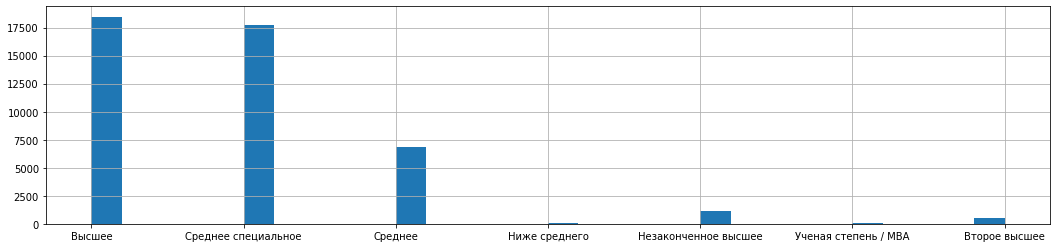

In [ ]:
df['Образование'].hist(figsize=(18,4), bins=30);

Можем сделать вывод, что чаще всего кредиты берут люди, получившие только высшее или среднее специальное образование

Чтобы детальнее узнать возраст клиентов, посмотрим на даты рождения

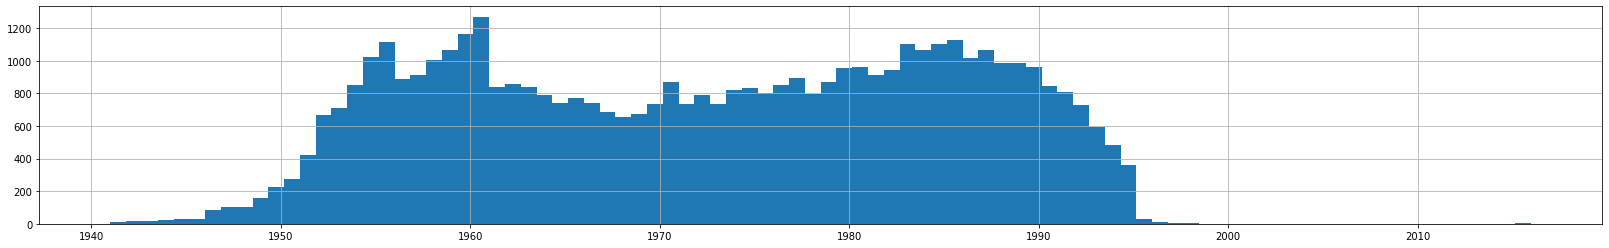

In [ ]:
df['Дата рождения'].hist(figsize=(28,4), bins=90);

Распределение близко к бимодальному (чаще всего берут кредиты, родившиеся в ~1960 и ~1985

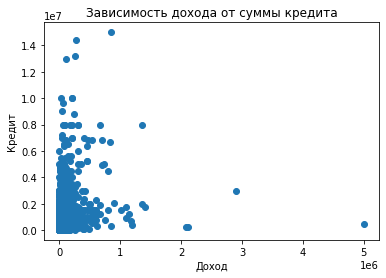

In [ ]:
plt.scatter(df['Среднемесячный подтвержденный доход'], df['Запрошенная сумма'])
plt.title('Зависимость дохода от суммы кредита')
plt.xlabel('Доход')
plt.ylabel('Кредит')
plt.show()

А это интересный график запрошенных сумм на кредит

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


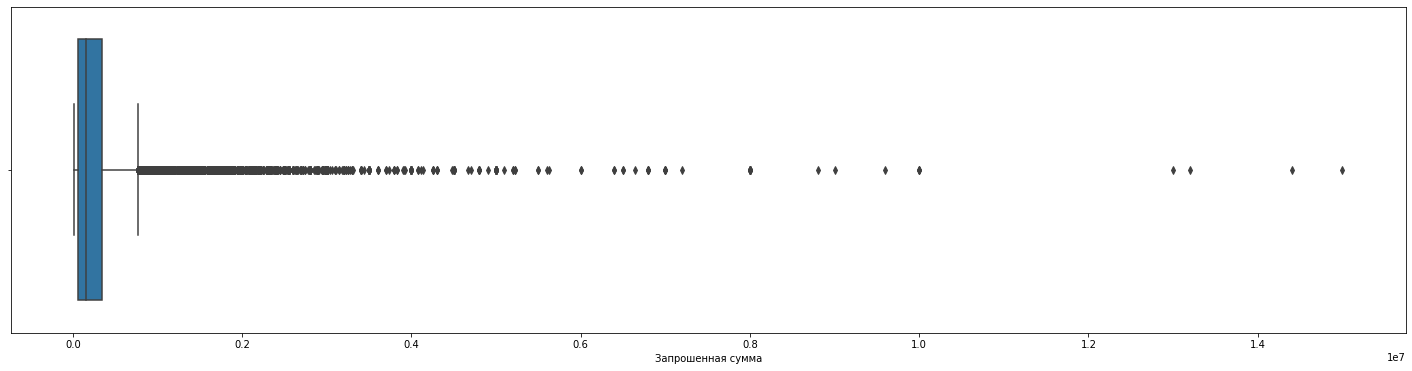

In [ ]:
fig, ax = plt.subplots(figsize=(25, 6))
sns.boxplot(df['Запрошенная сумма'])

Тепловая карта корреляций (красный - это высокая "+" корреляция, синий - высокая "-" корреляция)

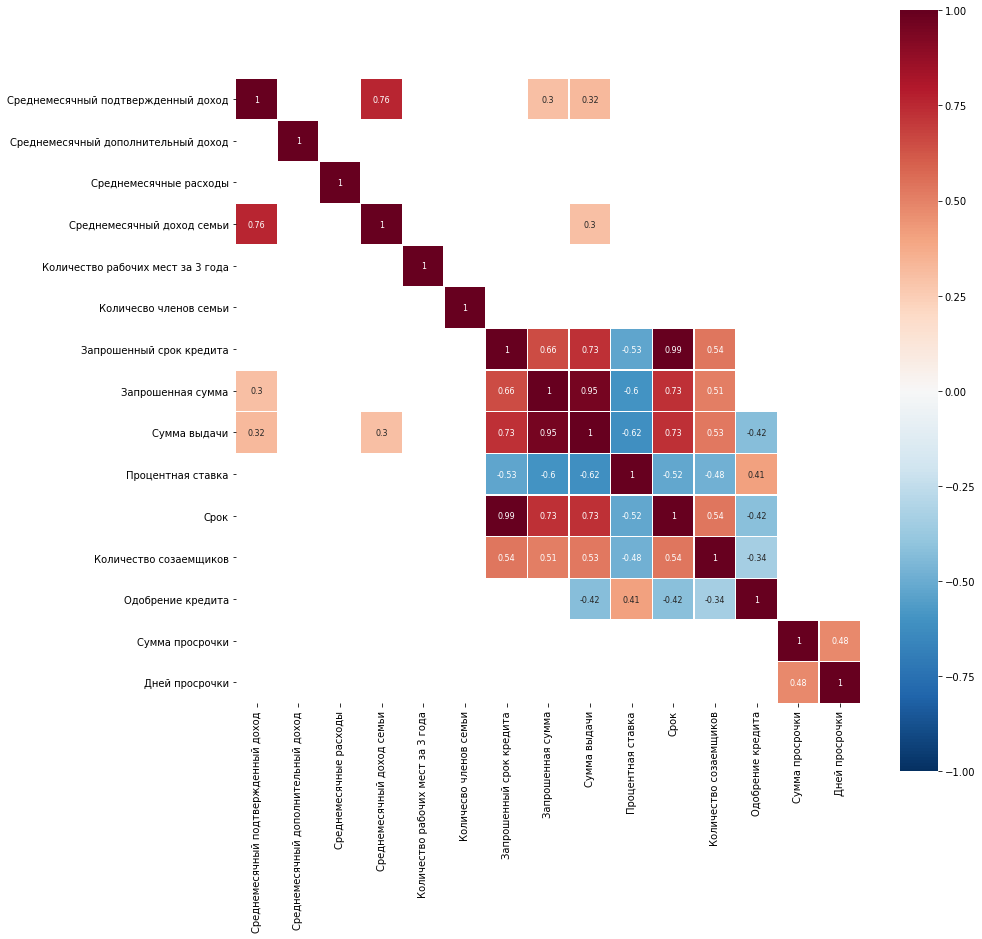

In [ ]:
corr = df.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)],
            cmap="RdBu_r", vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# Обработка датасета

Посмотрим на количество классов в каждом object столбце

In [ ]:
df.dropna(inplace=True)

In [ ]:
obj_cols = [col for col in df.columns if df[col].dtype.name=='object'] #столбцы с нечисловыми значениями

In [ ]:
df1 = df.copy()

In [ ]:
for col in obj_cols:
  print(f'{col} {len(df[col].unique())}\n{df[col].unique()}\n\n')

Образование 7
['Среднее специальное' 'Высшее' 'Незаконченное высшее' 'Среднее'
 'Ученая степень / МВА' 'Второе высшее' 'Ниже среднего']


Работа по трудовому договору 7
['Без сроkа (постоянная занятость)' 'Срочный kонтраkт'
 'Индивидуальный предприниматель' 'Частная праkтиkа (уточните)'
 'Исполнитель по граждансkо-правовому договору' 'Судья'
 'Агент на kомиссионном договоре']


Категория должности 12
['Специалист' 'Служащий' 'Руководитель высшего звена'
 'Руководитель среднего звена' 'Высококвалифицированный специалист'
 'Рабочий' 'Военнослужащий'
 'Владелец предприятия/ген.Директор/Главный бухгалтер'
 'Руководитель начального звена' 'Государственный гражданский служащий'
 'Судья' 'Нотариус']


Вид деятельности компании 20
['Образование' 'Финансы, банки, страхование' 'Органы власти и управления'
 'Услуги (уточните)' 'Медицина' 'Армия' 'Промышленность и машиностроение'
 'Оптовая / розничная торговля (уточните)' 'Транспорт'
 'Другие отрасли (уточните)' 'Социальная сфера' 'Строительство'


Классы, в которых меньше 4 признаков, обработаем с get_dummies, остальные с помощью label encoder

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
for col in obj_cols:
  if len(df1[col].unique()) < 4:
    temp = pd.get_dummies(df1[col])
    temp.columns = list(map((lambda x: str(col)+' '+str(x)), temp.columns))
    df1 = df1.join(temp)
    df1.drop(col, axis=1, inplace=True)
  else:
    df1[col] = le.fit_transform(df1[col].astype(str).values)

In [ ]:
df1.head()

,Дата рождения,Образование,Среднемесячный подтвержденный доход,Среднемесячный дополнительный доход,Среднемесячные расходы,Среднемесячный доход семьи,Работа по трудовому договору,Категория должности,Вид деятельности компании,Количество сотрудников в компании,Срок работы в организации,Количество рабочих мест за 3 года,Семейное положение,Количесво членов семьи,Запрошенный срок кредита,Запрошенная сумма,Дата Выдачи,Сумма выдачи,Процентная ставка,Срок,Количество созаемщиков,Одобрение кредита,Сумма просрочки,Дней просрочки,Наличие детей Да,Наличие детей Нет,Тип кредита Ипотека,Тип кредита Потреб
4,1980-11-10,5,16000.00,20533.0,0.0,40000.00,1,10,8,1,5,1.0,3,3.0,60,150000.0,2016-01-12,165000.0,22.85,60.0,0.0,1,5467.37,61.0,1,0,0,1
5,1961-07-03,1,20000.00,0.0,0.0,20000.00,1,10,19,3,0,1.0,4,1.0,60,300000.0,2016-01-11,300000.0,18.50,60.0,0.0,1,0.00,0.0,0,1,0,1
7,1983-01-20,1,80000.00,0.0,0.0,80000.00,1,9,10,3,5,1.0,4,1.0,60,600000.0,2016-01-11,302000.0,21.90,60.0,1.0,1,0.00,0.0,0,1,0,1
12,1979-10-16,1,46074.38,0.0,0.0,77074.38,1,10,10,3,4,1.0,3,2.0,60,150000.0,2016-01-06,195000.0,22.70,60.0,0.0,1,0.00,0.0,0,1,0,1
14,1965-11-27,1,35000.00,0.0,0.0,100000.00,1,6,18,1,5,1.0,3,2.0,60,250000.0,2016-01-13,229000.0,22.80,60.0,0.0,1,0.00,0.0,1,0,0,1


Оставим только год  из колонок с датами

In [ ]:
df1['Дата рождения'] = [pd.to_datetime(x).year for x in df1['Дата рождения']]

In [ ]:
df1['Дата Выдачи'] = [pd.to_datetime(x).year for x in df1['Дата Выдачи']]

In [ ]:
df1.head()

,Дата рождения,Образование,Среднемесячный подтвержденный доход,Среднемесячный дополнительный доход,Среднемесячные расходы,Среднемесячный доход семьи,Работа по трудовому договору,Категория должности,Вид деятельности компании,Количество сотрудников в компании,Срок работы в организации,Количество рабочих мест за 3 года,Семейное положение,Количесво членов семьи,Запрошенный срок кредита,Запрошенная сумма,Дата Выдачи,Сумма выдачи,Процентная ставка,Срок,Количество созаемщиков,Одобрение кредита,Сумма просрочки,Дней просрочки,Наличие детей Да,Наличие детей Нет,Тип кредита Ипотека,Тип кредита Потреб
4,1980,5,16000.00,20533.0,0.0,40000.00,1,10,8,1,5,1.0,3,3.0,60,150000.0,2016,165000.0,22.85,60.0,0.0,1,5467.37,61.0,1,0,0,1
5,1961,1,20000.00,0.0,0.0,20000.00,1,10,19,3,0,1.0,4,1.0,60,300000.0,2016,300000.0,18.50,60.0,0.0,1,0.00,0.0,0,1,0,1
7,1983,1,80000.00,0.0,0.0,80000.00,1,9,10,3,5,1.0,4,1.0,60,600000.0,2016,302000.0,21.90,60.0,1.0,1,0.00,0.0,0,1,0,1
12,1979,1,46074.38,0.0,0.0,77074.38,1,10,10,3,4,1.0,3,2.0,60,150000.0,2016,195000.0,22.70,60.0,0.0,1,0.00,0.0,0,1,0,1
14,1965,1,35000.00,0.0,0.0,100000.00,1,6,18,1,5,1.0,3,2.0,60,250000.0,2016,229000.0,22.80,60.0,0.0,1,0.00,0.0,1,0,0,1


In [ ]:
data = preprocessing.StandardScaler().fit_transform(df1)

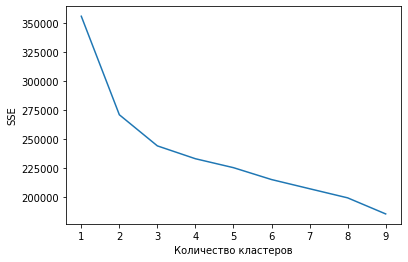

In [ ]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Количество кластеров")
plt.ylabel("SSE")
plt.show()

Наблюдаем перегиб на трех кластерах (больше брать смысла не имеет)

In [ ]:
# Изменить параметр n_clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter= 1000, n_init= 10, random_state= 3)
y_kmeans = kmeans.fit_predict(data)

In [ ]:
df_result=df1.copy()
df_result['kmeans']=kmeans.labels_
df_analize=df_result.groupby('kmeans').mean()
df_analize['Count']=df_result.groupby('kmeans')['kmeans'].count()
df_analize

,Дата рождения,Образование,Среднемесячный подтвержденный доход,Среднемесячный дополнительный доход,Среднемесячные расходы,Среднемесячный доход семьи,Работа по трудовому договору,Категория должности,Вид деятельности компании,Количество сотрудников в компании,Срок работы в организации,Количество рабочих мест за 3 года,Семейное положение,Количесво членов семьи,Запрошенный срок кредита,Запрошенная сумма,Дата Выдачи,Сумма выдачи,Процентная ставка,Срок,Количество созаемщиков,Одобрение кредита,Сумма просрочки,Дней просрочки,Наличие детей Да,Наличие детей Нет,Тип кредита Ипотека,Тип кредита Потреб,Count
kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1979.301490,2.170026,46662.446959,8674.417485,53.198948,69943.244724,1.087642,6.402279,9.627520,2.596845,3.446100,1.260298,2.789658,2.358457,181.961437,1.361619e+06,2015.854514,1.325660e+06,12.943295,182.303243,1.000000,0.484663,32.867669,0.172656,0.539001,0.460999,1.0,0.0,1141
1,1972.940837,2.929055,31182.416423,6241.742600,495.376034,56467.564843,1.054149,7.063926,8.602156,2.597894,3.247932,1.127350,2.488343,2.596139,44.011532,2.041878e+05,2015.040862,1.804070e+05,21.894372,45.480321,0.045124,0.987215,1327.062457,2.214841,1.000000,0.000000,0.0,1.0,3989
2,1976.022463,2.814614,29953.878437,6334.077400,335.471723,50266.335461,1.048362,6.888346,9.044530,2.605444,3.260042,1.152616,2.947542,1.561311,42.916226,2.025222e+05,2015.042548,1.887397e+05,22.156561,43.877114,0.052854,0.983879,1414.763635,3.155259,0.000000,1.000000,0.0,1.0,7568


In [ ]:
df_result[df_result['kmeans']==2]

,Дата рождения,Образование,Среднемесячный подтвержденный доход,Среднемесячный дополнительный доход,Среднемесячные расходы,Среднемесячный доход семьи,Работа по трудовому договору,Категория должности,Вид деятельности компании,Количество сотрудников в компании,Срок работы в организации,Количество рабочих мест за 3 года,Семейное положение,Количесво членов семьи,Запрошенный срок кредита,Запрошенная сумма,Дата Выдачи,Сумма выдачи,Процентная ставка,Срок,Количество созаемщиков,Одобрение кредита,Сумма просрочки,Дней просрочки,Наличие детей Да,Наличие детей Нет,Тип кредита Ипотека,Тип кредита Потреб,kmeans
5,1961,1,20000.00,0.0,0.0,20000.00,1,10,19,3,0,1.0,4,1.0,60,300000.00,2016,300000.0,18.50,60.0,0.0,1,0.0,0.0,0,1,0,1,2
7,1983,1,80000.00,0.0,0.0,80000.00,1,9,10,3,5,1.0,4,1.0,60,600000.00,2016,302000.0,21.90,60.0,1.0,1,0.0,0.0,0,1,0,1,2
12,1979,1,46074.38,0.0,0.0,77074.38,1,10,10,3,4,1.0,3,2.0,60,150000.00,2016,195000.0,22.70,60.0,0.0,1,0.0,0.0,0,1,0,1,2
17,1988,1,19708.26,0.0,0.0,19708.26,1,10,5,3,2,2.0,4,1.0,36,300000.00,2016,300000.0,27.45,36.0,0.0,1,0.0,0.0,0,1,0,1,2
27,1977,1,60000.00,20000.0,0.0,100000.00,4,8,0,3,4,1.0,3,2.0,6,50000.00,2016,55000.0,21.75,6.0,0.0,1,0.0,0.0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46535,1993,5,30000.00,0.0,0.0,30000.00,1,1,0,3,6,1.0,4,1.0,12,62284.00,2015,62284.0,22.00,12.0,0.0,0,0.0,0.0,0,1,0,1,2
46538,1970,0,19300.00,50000.0,0.0,75000.00,1,8,8,1,2,1.0,3,2.0,60,130000.00,2015,169000.0,27.05,60.0,0.0,1,0.0,0.0,0,1,0,1,2
46541,1965,1,22315.41,0.0,0.0,67500.00,1,5,14,3,4,1.0,3,2.0,60,235155.79,2015,219000.0,23.00,60.0,0.0,1,0.0,0.0,0,1,0,1,2
46546,1988,1,55000.00,0.0,0.0,55000.00,1,1,0,3,2,1.0,4,1.0,36,150000.00,2015,150000.0,23.00,36.0,0.0,1,0.0,0.0,0,1,0,1,2
